<a href="https://colab.research.google.com/github/GreatLearningAIML1/gurgaon-feb-batch-abhishek02git/blob/master/Recommendation_Systems_R6_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

**1 Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)**

In [2]:
# Load data file
print (datetime.now())
df = pd.read_csv('http://h0.ai/static/ratings_Electronics.csv',header=None)
print (datetime.now())

2019-07-21 17:20:20.643665
2019-07-21 17:20:44.857409


In [0]:
# Assign column names to the table
df.columns=['userID','productID','rating','timestamp']

In [0]:
# Drop timestamp as it is not required for recommendation 
df.drop(labels=['timestamp'],axis =1, inplace = True)

In [5]:
# Check data sample
df.head()

,userID,productID,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [6]:
print ("Total number of records %0.0f" %(len(df)))
print ("No of unique UserID %0.0f" %len(df['userID'].unique()))
print ("No of unique Product ID %0.0f" %len(df['productID'].unique()))
print ("No of unique Ratings %0.0f" %len(df['rating'].unique()))
df['rating'].unique()

Total number of records 7824482
No of unique UserID 4201696
No of unique Product ID 476002
No of unique Ratings 5


array([5., 1., 3., 2., 4.])

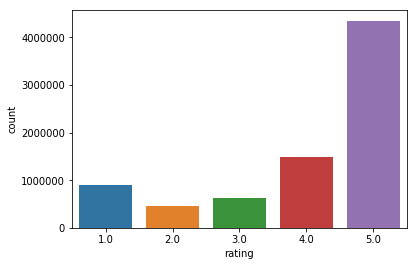

In [7]:
# see distribution of ratings
sns.countplot(df['rating'])




*   5 Rating has been given most number of times


In [8]:
print(df.groupby('productID')['rating'].count().reset_index().sort_values('rating',ascending=False).head(10))
print ('\n')
print(df.groupby('productID')['rating'].count().reset_index().sort_values('rating',ascending=True).head(10))

         productID  rating
308398  B0074BW614   18244
429572  B00DR0PDNE   16454
327308  B007WTAJTO   14172
102804  B0019EHU8G   12285
296625  B006GWO5WK   12226
178601  B003ELYQGG   11617
178813  B003ES5ZUU   10276
323013  B007R5YDYA    9907
289775  B00622AG6S    9823
30276   B0002L5R78    9487


         productID  rating
0       0132793040       1
263166  B0058FM05U       1
263167  B0058FM0M8       1
263169  B0058FM320       1
263170  B0058FM5IM       1
263176  B0058FOLWU       1
263183  B0058FS2DO       1
263186  B0058FTDQE       1
263187  B0058FU57U       1
263188  B0058FUM3C       1


**`We can see that there are lot of Products that have been just rated once compared to other products that have been rated thounds of time`**



In [9]:
print(df.groupby('userID')['rating'].count().reset_index().sort_values('rating',ascending=False).head(10))
print ('\n')
print(df.groupby('userID')['rating'].count().reset_index().sort_values('rating',ascending=True).head(10))

                 userID  rating
3263531   A5JLAU2ARJ0BO     520
3512451    ADLVFFE4VBT8     501
2989526  A3OXHLG6DIBRW8     498
3291008    A6FIAB28IS79     431
3284634   A680RUE1FDO8B     406
755206   A1ODOGXEYECQQ8     380
2424036  A36K2N527TXXJN     314
1451394  A2AY4YUOX2N1BQ     311
4100926   AWPODHOB4GFWL     308
1277963  A25C2M3QF9G7OQ     296


                        userID  rating
0        A00000262KYZUE4J55XGL       1
2540191         A3AAXWDYVQ93SZ       1
2540192         A3AAXWHVCN6VOG       1
2540193          A3AAXX0N47FFP       1
2540194         A3AAXY0TMZS72Y       1
2540195         A3AAXZAK8EB9KG       1
2540196         A3AAY0GAXS0XNA       1
2540200         A3AAY3OP8Z7FTA       1
2540201         A3AAY5WI5T8HN5       1
2540203         A3AAYE1Y83YT2P       1


`We can see that there are lot of users who have rated once compared to other users who have rated 100s of time'

**Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )**

In [0]:
# Keep users' records that have rated more than 50 time and Books that have been rated more than 50 times
min_user_rating = 50
min_book_rating = 50

users2keep = df['userID'].value_counts() > min_user_rating
users2keep = users2keep[users2keep].index.tolist()

books2keep = df['productID'].value_counts() > min_user_rating
books2keep = books2keep[books2keep].index.tolist()

In [0]:
rating_df = df[(df['userID'].isin(users2keep)) & (df['productID'].isin(books2keep))]

In [12]:
# Check no of remaining records
print(len(rating_df))
rating_df.head()

76359


,userID,productID,rating
492,A3CLWR1UUZT6TG,0972683275,5.0
631,A3TAS1AG6FMBQW,0972683275,5.0
1138,A25RTRAPQAJBDJ,0972683275,5.0
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0


# Create popularity based model

In [13]:
# Popularity based model
#Create a dataframe 
popular_product = pd.DataFrame(columns=['score','avg_rating','rank'])

#get Score based on no of ratings provided to the prodict 
popular_product['score'] = rating_df.groupby('productID')['rating'].count()

#Get Avarage Rating given to the product
popular_product['avg_rating'] = rating_df.groupby('productID')['rating'].mean()

#Sort dataframe based on Score (no of ratings)
popular_product = popular_product.sort_values(by=['score','avg_rating'],ascending = False).reset_index()

# Add rank after sorting
popular_product['rank'] = popular_product['score'].rank(ascending=0, method='first')

#display first 10 recommendation
popular_product.head(10)

,productID,score,avg_rating,rank
0,B0088CJT4U,204,4.215686,1.0
1,B003ES5ZUU,177,4.858757,2.0
2,B000N99BBC,163,4.773006,3.0
3,B007WTAJTO,156,4.692308,4.0
4,B00829TIEK,146,4.431507,5.0
5,B008DWCRQW,135,4.088889,6.0
6,B00829THK0,132,4.409091,7.0
7,B002R5AM7C,127,4.118110,8.0
8,B004CLYEDC,117,4.666667,9.0
9,B002SZEOLG,108,4.287037,10.0




```
Above recommendation will be same for all user as popularity based model is not personalised
```



Products between 10 to 50 Ratings


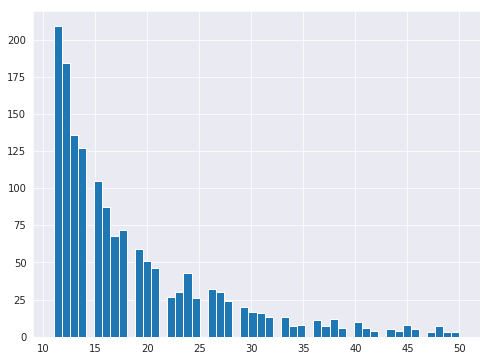

Products above 50 Ratings


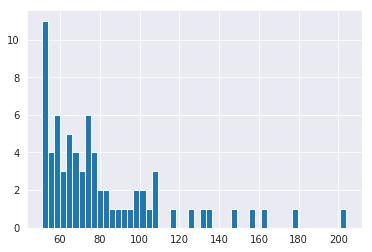

In [14]:
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set_style('dark')  
%matplotlib inline

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
popular_product['score'][(popular_product['score']>10) & (popular_product['score']<=50)].hist(bins=50)
print("Products between 10 to 50 Ratings")
plt.show()
popular_product['score'][popular_product['score']>50].hist(bins=50) 
print("Products above 50 Ratings")
plt.show()

# Build Collaborative Filtering model.

In [15]:
# Install surprise package as it is not installed by default in colab
! pip install surprise

In [0]:
# Import surpise library

from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, accuracy
from surprise import Dataset, Reader
from surprise import evaluate, print_perf
from surprise.model_selection import cross_validate, train_test_split

In [0]:
# Create surprice dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_df[['userID','productID','rating']],reader)

In [18]:
# Split data in train and test
trainset, testset = train_test_split(data,test_size=0.25,random_state=10)
type(trainset)

surprise.trainset.Trainset

In [19]:
# KNN for Item based collaborative filter
item_algo = KNNWithMeans(k=5,sim_options={'name':'pearson','user_based':False})
item_algo.fit(trainset)

# KNN for User based collaborative filter
user_algo = KNNWithMeans(k=5,sim_options={'name':'pearson','user_based':True})
user_algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [0]:
user_test_pred = user_algo.test(testset)
#print("Accuracy of user based collaborative folter is: ", accuracy.rmse(user_test_pred))

item_test_pred = item_algo.test(testset)
#print("Accuracy of item based collaborative folter is: ",accuracy.rmse(item_test_pred))

In [21]:
print (user_test_pred[1])
print (item_test_pred[1])

user: A18FLOC8YQY0P8 item: B0075SUK14 r_ui = 5.00   est = 4.37   {'actual_k': 0, 'was_impossible': False}
user: A18FLOC8YQY0P8 item: B0075SUK14 r_ui = 5.00   est = 4.75   {'actual_k': 0, 'was_impossible': False}


In [0]:
user_pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in user_test_pred],columns=['userID','productID','Estimated_Rating'])
user_pred_df['Algo'] = "User Based"
item_pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in item_test_pred],columns=['userID','productID','Estimated_Rating'])
item_pred_df['Algo'] = "Item Based"

**Create SVD Based algorithm**

In [0]:
svd_algo = SVD(n_factors=5, biased=False)
svd_algo.fit(trainset)

svd_pred = svd_algo.test(testset)

svd_pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in svd_pred],columns=['userID','productID','Estimated_Rating'])
svd_pred_df['Algo'] = "SVD"

In [0]:
userID = 'A3CLWR1UUZT6TG'

In [25]:
# Check top recommendation for user base collaborative model
#user_pred_df[(user_pred_df['userID']==userID) & (user_pred_df['Estimated_Rating']>4)].sort_values(by=['Estimated_Rating'],ascending=False).head(5)
print("Accuracy of user based collaborative filter is: ", accuracy.rmse(user_test_pred))
user_pred_df[(user_pred_df['userID']==userID)].sort_values(by=['Estimated_Rating'],ascending=False).head(5)

RMSE: 1.0281
Accuracy of user based collaborative filter is:  1.0280631936225737


,userID,productID,Estimated_Rating,Algo
2698,A3CLWR1UUZT6TG,B0093HGD2K,4.578947,User Based
4449,A3CLWR1UUZT6TG,B0057AVXJA,4.578947,User Based
18480,A3CLWR1UUZT6TG,B0097BEFYA,4.578947,User Based
801,A3CLWR1UUZT6TG,B0034XDTF8,4.302031,User Based


In [26]:
#item_pred_df[(item_pred_df['userID']==userID) & (item_pred_df['Estimated_Rating']>4)].sort_values(by=['Estimated_Rating'],ascending=False).head(5)
print("Accuracy of item based collaborative filter is: ",accuracy.rmse(item_test_pred))
item_pred_df[(item_pred_df['userID']==userID)].sort_values(by=['Estimated_Rating'],ascending=False).head(5)

RMSE: 1.1332
Accuracy of item based collaborative filter is:  1.1332324591467895


,userID,productID,Estimated_Rating,Algo
4449,A3CLWR1UUZT6TG,B0057AVXJA,4.500000,Item Based
801,A3CLWR1UUZT6TG,B0034XDTF8,4.302031,Item Based
2698,A3CLWR1UUZT6TG,B0093HGD2K,4.285714,Item Based
18480,A3CLWR1UUZT6TG,B0097BEFYA,3.015385,Item Based


In [27]:
#svd_pred_df[(svd_pred_df['userID']==userID) & (svd_pred_df['Estimated_Rating']>4)].sort_values(by=['Estimated_Rating'],ascending=False).head(5)
print("Accuracy of SVD based collaborative filter is: ",accuracy.rmse(svd_pred))
svd_pred_df[(svd_pred_df['userID']==userID)].sort_values(by=['Estimated_Rating'],ascending=False).head(5)

RMSE: 1.6584
Accuracy of SVD based collaborative filter is:  1.6584255929592564


,userID,productID,Estimated_Rating,Algo
2698,A3CLWR1UUZT6TG,B0093HGD2K,4.663975,SVD
18480,A3CLWR1UUZT6TG,B0097BEFYA,4.653016,SVD
801,A3CLWR1UUZT6TG,B0034XDTF8,4.302031,SVD
4449,A3CLWR1UUZT6TG,B0057AVXJA,4.062517,SVD


*We see that all three algoriths have predicted same top 5 Product for a given user but the predicted rating slightly varies*